In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use("bmh")

# Linear regression: solutions
## Ordinary least squares by pseudoinverse and gradient descent

First, create some example data. There are $N=1000$ data points with one dimension of input and one dimension of output. 

In [2]:
N = 1000
w0 = np.array([1, 2])
X = np.empty((N, 2))
X[:, 1] = 1 # for b, the y-intercept
X[:, 0] = np.random.normal(0, 1, N)
y0 = X @ w0
y = y0 + np.random.normal(0, 0.1, N) # y is y0 plus noise

<IPython.core.display.Javascript object>


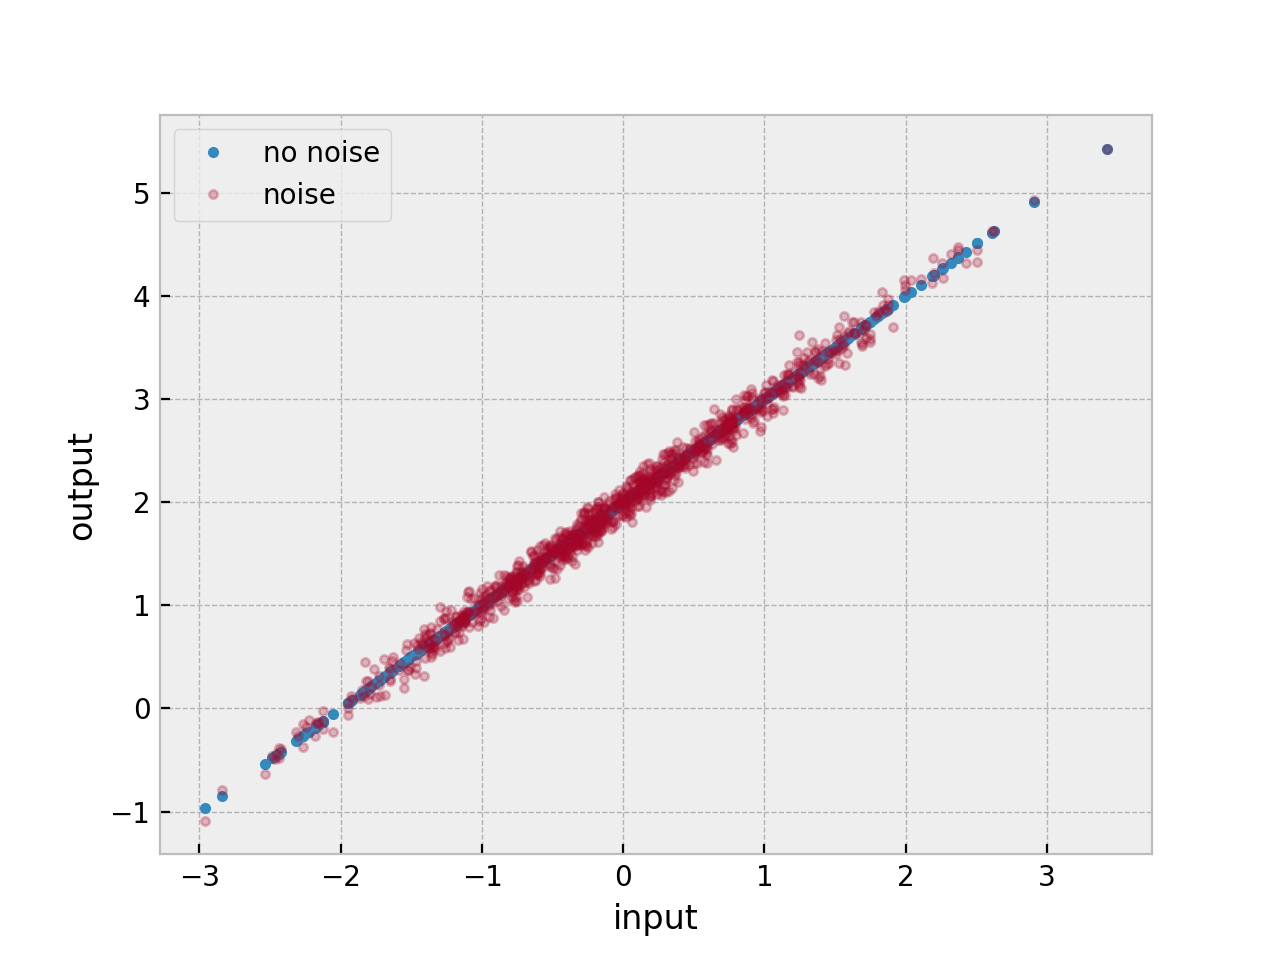

Text(0, 0.5, 'output')

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:, 0], y0, ".", label="no noise") # no noise
ax.plot(X[:, 0], y, ".", alpha=0.25, label="noise") # noise
ax.legend(loc=0)
ax.set_xlabel("input")
ax.set_ylabel("output")

Write a function to compute the mean squared error.
$$ MSE(w) = N^{-1} \sum_{i=1}^{N}(y_{i, pred} - y_{i, true})^2$$
$$ = N^{-1} \sum_{i=1}^{N}(x_i w - y_{i, true})^2 $$

In [12]:
def mse(X, w, y):
    return np.mean((X@w - y)**2)

In [5]:
mse(X, w0, y0)

0.0

In [6]:
mse(X, w0, y)

0.009984089633569625

## Solve for $w$ with pseudoinverse

$$ = N^{-1} \sum_{i=1}^{N}(x_i w - y_{i, true})^2 $$

$MIN(xw - y)$

$xw - y = 0$ and solve for w

$x^Txw = x^Ty$

$(x^Tx)^{-1}(x^Tx)w = (x^Tx)^{-1}x^Ty$

$w = (x^Tx)^{-1}x^Ty$

In [13]:
def w_from_psudoinverse(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y_true

In [9]:
w_from_psudoinverse(X, y0)

array([1., 2.])

In [10]:
w_from_psudoinverse(X, y)

array([0.99967746, 1.99612679])

## Solve for $w$ with gradient descent

In [11]:
def gradient_descent(f, gradf, eta, w, iteration=10000):
    prev_f = 100000
    tol = 1e-3
    while abs((f_val := (f(w)) - prev_f)) >= tol and iteration >= 0:
        prev_f = f_val
        w = w - eta * gradf(w)
        iteration -= 1
        
    return w

In [14]:
def mse_grad(X, w, y):
    return 2 * X.T @ (X @ w - y) / N

In [15]:
mse_grad(X, w0, y0)

array([0., 0.])

In [16]:
mse_grad(X, w0, y)

array([0.00029522, 0.00772047])

In [17]:
mse_grad(X, [1, 1], y)

array([ 0.08073896, -1.99227953])

In [18]:
gradient_descent(
    lambda w : mse(X, w, y),
    lambda w : mse_grad(X, w, y),
    0.1,
    np.zeros(2)
)

array([0.99967746, 1.99612679])